In [15]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from tqdm import notebook
from sklearn.linear_model import LogisticRegression
import multiprocessing as mp
from Parallell import recombination, parallelization

In [16]:
data = pd.read_csv("Вячеслав Сергеевич Денисов.csv", dtype = str)
data.loc[:,"p_cncr5110":"p_cncr7481"] = (data.loc[:,"p_cncr5110":"p_cncr7481"]).astype(float)
data

,Unnamed: 0,p_cncr5110,p_cncr9580,p_cncr4211,p_cntrl2241,p_cncr6852,p_cncr5544,p_cntrl9937,p_cntrl1122,p_cncr4638,...,p_cncr1414,p_cncr2842,p_cncr5302,p_cncr6214,p_cncr4923,p_cntrl9973,p_cntrl4742,p_cntrl6491,p_cntrl7387,p_cncr7481
0,11001010110010011111,25051.0,3744.0,106996.0,2404.0,4481376.0,7462.0,5559.0,966838.0,563781.0,...,69264.0,493.0,697783.0,194397.0,12963.0,141785.0,90227.0,17114.0,128707.0,1759.0
1,00110011000111010110,2759.0,3351775.0,1721.0,269212.0,27450.0,10412.0,55573.0,2466628.0,15682.0,...,4352.0,1916.0,15.0,95290.0,17111.0,8330656.0,329761.0,1635088.0,926.0,21588.0
2,00110101111100000101,366.0,43126.0,5503.0,15972.0,7561.0,198410.0,2696.0,1646503.0,25109.0,...,240351.0,14246681.0,4910.0,883563.0,402145.0,130234.0,123565.0,120571.0,59383.0,8406.0
3,00010001010110010101,83066.0,502.0,4209.0,2719.0,1606.0,125730.0,19689.0,40740.0,146964.0,...,1293613.0,15990228.0,10277.0,537179.0,2080208.0,64.0,204316.0,4217.0,36094.0,3499993.0
4,10011001011011100101,72614.0,39131.0,47.0,2454137.0,30944.0,3658.0,564190.0,1355178.0,168096.0,...,5880.0,15534.0,12.0,4800.0,3478.0,2369764.0,29365.0,173895.0,54141.0,3837.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,11011101110000101001,21872.0,6076.0,2476716.0,34320.0,265132.0,3400.0,17854.0,19986.0,767938.0,...,99673.0,118004.0,760196.0,1649042.0,553704.0,43366.0,2595.0,3874.0,12539.0,3441.0
4981,00011001111011010001,95779.0,515839.0,413.0,87363.0,25187.0,1156.0,21555.0,122789.0,42046.0,...,152.0,6847.0,5.0,12426.0,59770.0,180041.0,54759.0,35895.0,17063.0,6222.0
4982,01000110001110101001,19144791.0,1606611.0,16090.0,14842.0,443166.0,2227.0,301696.0,2688421.0,12746.0,...,156823.0,96783.0,12962.0,1278.0,32945.0,7037.0,13234.0,1020.0,19698.0,154820.0
4983,10001111010100000010,620875.0,81935.0,43341.0,157013.0,313166.0,62.0,6547.0,30129.0,1403359.0,...,15105.0,92498.0,6862926.0,213631.0,951296.0,5478.0,66126.0,9036584.0,655921.0,17096.0


In [17]:
for i in range (len(data.iloc[0,0])):
    for j in range(len(data)):
        data.loc[j,"Position_gen %d"%(i)] = int(data.iloc[j,0][i])
data.head()                

,Unnamed: 0,p_cncr5110,p_cncr9580,p_cncr4211,p_cntrl2241,p_cncr6852,p_cncr5544,p_cntrl9937,p_cntrl1122,p_cncr4638,...,Position_gen 10,Position_gen 11,Position_gen 12,Position_gen 13,Position_gen 14,Position_gen 15,Position_gen 16,Position_gen 17,Position_gen 18,Position_gen 19
0,11001010110010011111,25051.0,3744.0,106996.0,2404.0,4481376.0,7462.0,5559.0,966838.0,563781.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,00110011000111010110,2759.0,3351775.0,1721.0,269212.0,27450.0,10412.0,55573.0,2466628.0,15682.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,00110101111100000101,366.0,43126.0,5503.0,15972.0,7561.0,198410.0,2696.0,1646503.0,25109.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,00010001010110010101,83066.0,502.0,4209.0,2719.0,1606.0,125730.0,19689.0,40740.0,146964.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,10011001011011100101,72614.0,39131.0,47.0,2454137.0,30944.0,3658.0,564190.0,1355178.0,168096.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


def recombination(data_array):

    import pandas as pd
    import numpy as np
    from tqdm import tqdm_notebook
    import multiprocessing as mp
    
    gen_pairs = []
    for i in range (20):
        for j in range (i+1, 20):
            gen_pairs.append([i,j])
    types =[[0,0],[0,1],[1,0],[1,1]]
    
    for i in tqdm_notebook(range(len(gen_pairs))):
    #for i in range(len(gen_pairs)):
        for j in range(len(types)):
            columns = "(%d,%d)_(%d,%d)"%(gen_pairs[i][0], gen_pairs[i][1], types[j][0], types[j][1])
            for k in data_array.index.tolist():
                if (data_array["Position_gen %d"%(gen_pairs[i][0])][k] == types[j][0]) and (data_array["Position_gen %d"%(gen_pairs[i][1])][k] == types[j][1]):
                    data_array.loc[k, columns] = 1
                else:
                    data_array.loc[k, columns] = 0
    return data_recomb

def parallelization(data_array, method):
    
    import pandas as pd
    from tqdm import tqdm_notebook
    import multiprocessing as mp
    import numpy as np

    partitions = 6
    workers = 6
    data_splited = np.array_split(data_array, partitions)
    #print(data_splited[0].dtype)
    pool = mp.Pool(workers)
    data_array = pd.concat(pool.map(method, data_splited))
    pool.close()
    pool.join()
    return data_array

In [18]:
if __name__ == "__main__":
    #mp.freeze_support()
    
    data = parallelization(data, recombination)

In [19]:
regression = pd.DataFrame()
for i in notebook.tqdm(data.columns[1:31]):
    for j in data.columns[31:]:
        temp = data[data[j] == 1][[j, i]]
        N = sum(data[i])
        regression.loc[i,j] = sum(temp[i])/ N

  0%|          | 0/30 [00:00<?, ?it/s]

In [20]:
regression.head()

,Position_gen 0,Position_gen 1,Position_gen 2,Position_gen 3,Position_gen 4,Position_gen 5,Position_gen 6,Position_gen 7,Position_gen 8,Position_gen 9,...,"(17,18)_(1,0)","(17,18)_(1,1)","(17,19)_(0,0)","(17,19)_(0,1)","(17,19)_(1,0)","(17,19)_(1,1)","(18,19)_(0,0)","(18,19)_(0,1)","(18,19)_(1,0)","(18,19)_(1,1)"
p_cncr5110,0.487806,0.507426,0.566484,0.404549,0.489339,0.535178,0.657718,0.534359,0.453251,0.631851,...,0.256992,0.320390,0.252374,0.170245,0.268311,0.309070,0.248269,0.231079,0.272416,0.248236
p_cncr9580,0.505252,0.462641,0.485801,0.441266,0.493550,0.481347,0.622369,0.521924,0.452403,0.581612,...,0.263946,0.245341,0.232685,0.258028,0.263013,0.246274,0.223670,0.308683,0.272028,0.195619
p_cncr4211,0.500138,0.537734,0.562019,0.282361,0.512963,0.539482,0.562206,0.522174,0.456948,0.582089,...,0.251207,0.260571,0.235486,0.252736,0.195685,0.316093,0.240331,0.260992,0.190840,0.307837
p_cntrl2241,0.519165,0.574048,0.444951,0.469588,0.465091,0.482300,0.484468,0.469256,0.526759,0.395513,...,0.241614,0.201079,0.218914,0.338392,0.216909,0.225785,0.226457,0.277814,0.209366,0.286363
p_cncr6852,0.482275,0.414924,0.439056,0.340130,0.501509,0.472214,0.484440,0.542704,0.414729,0.504146,...,0.171286,0.343695,0.198637,0.286382,0.231741,0.283241,0.175419,0.225767,0.254958,0.343855


In [21]:
Cancer = pd.DataFrame() 
for i in regression.index:
    if i [:6] == 'p_cncr':
        Cancer.loc[i,'Cancer'] = 1
    else:
        Cancer.loc[i,'Cancer'] = 0
Cancer

,Cancer
p_cncr5110,1.0
p_cncr9580,1.0
p_cncr4211,1.0
p_cntrl2241,0.0
p_cncr6852,1.0
p_cncr5544,1.0
p_cntrl9937,0.0
p_cntrl1122,0.0
p_cncr4638,1.0
p_cncr2102,1.0


In [22]:
accuracy = []
param = []
for i in notebook.tqdm(regression.columns):
    X = np.reshape(np.array(regression[i]), (-1,1))
    Y = np.array(Cancer['Cancer'])
    
    regr = LogisticRegression(penalty = 'none').fit(X, Y)
    accuracy.append(regr.score(X, Y))
    param.append(i)

  0%|          | 0/780 [00:00<?, ?it/s]

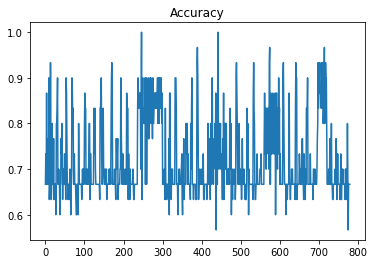

In [23]:
plt.title('Accuracy')
plt.plot(accuracy)

In [24]:
print("Best accuracy:", accuracy[accuracy.index(max(accuracy))])
print("Best parameter:", param[accuracy.index(max(accuracy))])

Best accuracy: 1.0
Best parameter: (3,6)_(1,0)


def Log_Regression_parallel(regression, Cancer, method):
    
    gen_pairs_2 = []
    columns = regression.columns
    for i in tqdm(range(len(columns))):
        for j in range(i,len(columns)):
            if i != j:
                gen_pairs_2.append(pd.concat((Cancer,regression[[columns[i],columns[j]]]), axis = 1))
        
    #num_partitions = 80 # количество частей, на которые будет разбит дейта-фрейм
    num_workers = 8

    pool = mp.Pool(num_workers)
    df = pool.map(method, gen_pairs_2)
    
    pool.close()
    pool.join()
    return data

def Log_R(data):
    
    col = data.columns
    X = np.reshape(np.array(data[[col[1],col[2]]]), (-1,2))
    Y = np.array(data[col[0]])

    LogReg = LogisticRegression(penalty = 'none').fit(X, Y)
    return [LogReg.score(X, Y), data.columns[1] + " " + data.columns[2]]

In [25]:
from Parallell_760 import Log_Regression_parallel, Log_R
if __name__ == "__main__":
    #mp.freeze_support()
    
    LR = Log_Regression_parallel(regression, Cancer, Log_R)

100%|██████████| 780/780 [03:23<00:00,  3.83it/s]


In [26]:
Mas = np.array(LR)
accuracy_2 = np.array(Mas[:,0], dtype = 'float64')

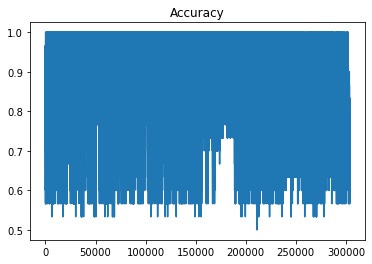

In [27]:
plt.title('Accuracy')
plt.plot(accuracy_2)

In [28]:
print('Best accuracy: ', accuracy_2.max())
print('Best parameter: ', LR[accuracy_2.argmax()][1])

Best accuracy:  1.0
Best parameter:  Position_gen 0 (3,6)_(1,0)
